In [1]:
import numpy as np
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")

$Gamma(\theta|k,\lambda)\propto \theta^{k-1}\exp(-\lambda \theta)$

In [4]:
eps = 1e-2  # 0.01  移動距離
lam = 1
k = 11
NMCS = 10000

## ハミルトニアン
$H = \frac{1}{2} p^2 - (k-1)\log\theta + \lambda \theta$

## 正準方程式
$\frac{d\theta}{dt} = p$  
  
$\frac{dp}{dt} = (k-1)\frac{1}{\theta} - \lambda$

In [8]:
f = lambda x, lam, k : (k-1) / x - lam

↑　xは、$\theta$

/tmp/ipykernel_15/263853567.py:3: RuntimeWarning: divide by zero encountered in log
  CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])  # ハミルトン式をわたす（３項め）


<a list of 4 text.Text objects>

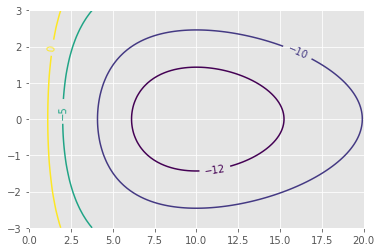

In [5]:
x, y = np.linspace(0, 20, 100), np.linspace(-3,3, 100)
X, Y = np.meshgrid(x,y)
CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])  # ハミルトン式をわたす（３項め）
plt.clabel(CS, inline=1, fontsize=10) 

# オイラー（Euler）法

$\theta(t+1) = \theta(t) + d\theta(t)$  
$p(t+1) = p(t) + dp(t)$

In [9]:
def euler(q,p,eps,lam,k,f):
    q_new = q + eps * p
    p_new = p + eps * f(q, lam, k)
    q, p = q_new, p_new
    return q, p

In [10]:
q, p = 4.0, 0.0  # 初期値
euler_arr = np.zeros([NMCS, 2])
euler_arr[0,0] = q
euler_arr[0,1] = p
for i in range(1,NMCS):
    q, p = euler(q, p, eps, lam, k, f)
    euler_arr[i,0], euler_arr[i,1] = q, p
df_euler = pd.DataFrame(euler_arr, columns=["q","p"])

/tmp/ipykernel_15/789377478.py:3: RuntimeWarning: divide by zero encountered in log
  CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])


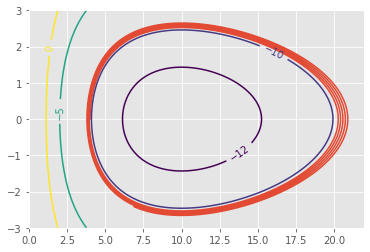

In [11]:
plt.plot(df_euler["q"], df_euler["p"])

CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)

plt.show();

↑　数値誤差が拡散している

# Leap-flog法

$p(t+0.5)=p(t)+0.5dp(t)$  
$\theta(t+1)=\theta(t)+d\theta(t+0.5)$  
$p(t+1)=p(t+0.5)+0.5dp(t+1)$

In [12]:
def leap_flog(q,p,eps,lam,k,f):
    p_new = p + 0.5 * eps * f(q, lam, k)
    q_new = q + eps * p_new
    p_new = p_new + 0.5 * eps * f(q_new,lam, k)
    q, p = q_new, p_new
    return q, p

In [13]:
q, p = 4.0, 0.0
lf_arr = np.zeros([NMCS, 2])
lf_arr[0,0] = q
lf_arr[0,1] = p
for i in range(1,NMCS):
    q, p = leap_flog(q, p, eps, lam, k, f)
    lf_arr[i,0], lf_arr[i,1] = q, p
df_lf = pd.DataFrame(lf_arr, columns=["q","p"])

/tmp/ipykernel_15/354693411.py:3: RuntimeWarning: divide by zero encountered in log
  CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])


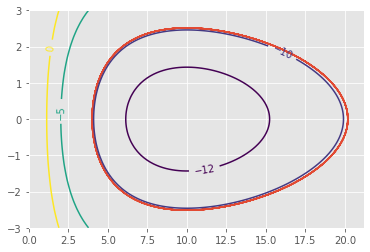

In [14]:
plt.plot(df_lf["q"], df_lf["p"])

CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)

plt.show();